# Assignment 1

In [2]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from itertools import product

## (1)Adjacency matrix. 
Consider the following adjacency matrix of a network

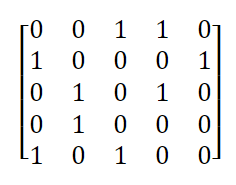

a) Is the network directed or undirected? (Explain why). 

**Directed. Since the adjacency matrix is unsymmetric**.

b) Draw the network. 

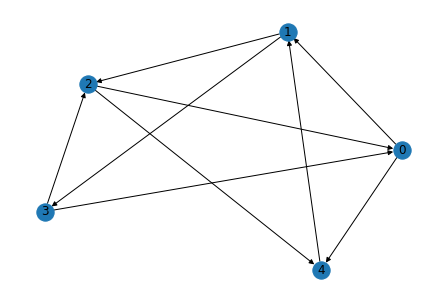

In [2]:
adj_mat = np.array([
    [0,0,1,1,0],
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,1,0,0,0],
    [1,0,1,0,0]
])

ga = nx.DiGraph(adj_mat.T)
nx.draw_kamada_kawai(ga,with_labels=True)

c) List the in-degree sequence and the out-degree sequence of the network.

In [3]:
ga.in_degree,ga.out_degree

(InDegreeView({0: 2, 1: 2, 2: 2, 3: 1, 4: 2}),
 OutDegreeView({0: 2, 1: 2, 2: 2, 3: 2, 4: 1}))

**So, the in-degree sequence is $[2,2,2,1,2]$ and the out-degree sequence is $[2,2,2,2,1]$.**

d) Determine the in-degree distribution and the out-degree distribution. 

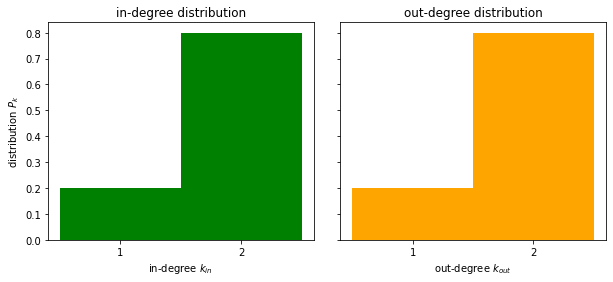

In [4]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 4))
plt.subplots_adjust(wspace=.1)

ax[0].hist(dict(ga.in_degree).values(),bins=[0.5,1.5,2.5],color='green',density=True)
ax[0].set_xlabel('in-degree $k_{in}$')
ax[0].set_title('in-degree distribution')

ax[1].hist(dict(ga.out_degree).values(),bins=[0.5,1.5,2.5],color='orange',density=True)
ax[1].set_xlabel('out-degree $k_{out}$')
ax[1].set_title('out-degree distribution')

ax[0].set_ylabel('distribution $P_k$')
plt.xticks([1,2],[1,2]);

## (2)Number network. 
Let S = {2, 3, 4, 7, 11, 13}. Consider the directed graph G whose vertex set is S and 
where each link from i to j (the value of i > j), such that ij ∈ E (G) for i, j ∈ S if (i + j) 
or (i − j) ∈ S. 

In [5]:
S = {2, 3, 4, 7, 11, 13}

gb = nx.DiGraph()

gb.add_nodes_from(S)

for i,j in product(S,S):
    if i > j:
        if i+j in S or i-j in S:
            gb.add_edge(i,j)

a) Draw the network. 

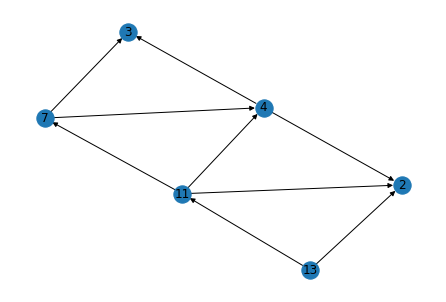

In [6]:
nx.draw_kamada_kawai(gb,with_labels=True)

b) Write down the adjacency matrix of the network. 

In [10]:
print('list(nodes) =', list(gb.nodes))
nx.to_numpy_array(gb,dtype=int).T

list(nodes) = [2, 3, 4, 7, 11, 13]


array([[0, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0]])

## (3)Diameter. 

One can calculate the diameter of certain types of network exactly. Assume that each 
of the following networks has network size N. 

(a) What is the diameter of a fully connected network? 

**1**

(b) What is the diameter of a star network? 

**2**

(c) What is the diameter of a linear chain of N nodes? (Figure 1 below) 

$N-1$

(d) What is the diameter D of a square portion of square lattice, with L nodes along 
each side (figure 2 below) ? 

$2(L-1)$

(e) Consider the expression found in (d), **show** that the leading term of D in terms of 
the total number of nodes N in the network, in the limit N >> 1 
$$
D\approx 2\sqrt N  
$$

**Show:**

**Since $L=\sqrt N$ in the "square portion of square lattice", so $D=2(\sqrt N-1)\approx 2\sqrt N$.**



(f) What is the diameter of the corresponding hypercubic lattice in d dimensions (d =3 
corresponds to a cubic lattice) with L nodes along each side, in the limit L>>1 
(hence N >> 1)? 

$d(L-1)$

(g) A Cayley tree is a symmetric regular tree in which each vertex is connected to the 
same number k of others, until we get out to the leaves, as shown in Figure 3. (k = 3 
in this case.) **Show** that the number of vertices reachable in d steps from the central 
vertex is $k(k-1)^{d-1}$  for d ≥ 1. Hence find an expression for **the diameter** of the 
network in terms of k and the number of **vertices** n. 
                 
**Show:**

**It is easy to show. Let denote "the number of vertices reachable in d steps" is $n_d$.**

**When $d=1$, it is easy to get $n_1=k$ by the definition of Cayley tree.**

**When $d=p$, we can get this recursion formula: $n_{p}=(k-1)\times n_{p-1}$ by the definition of Cayley tree.**

**Then,**

$$
n_d=
\begin{cases}
k,&d=1\\
(k-1)\times n_{d-1},&d>1\\
\end{cases}
$$

**Then, we can tranform this recursion formula and get $n_d=k(k-1)^{d-1}$.**

**The diameter of network in terms of k: $D_k=2d$.**

**The number of vertices:**
$$
\begin{align}
n
&=\sum_{p=0}^d n_p\\
&=1+\sum_{p=1}^d n_p\\
&=1+k\sum_{p=1}^d (k-1)^{(p-1)}\\
&=1+k\frac{(k-1)^d-1}{k-2}\\
\end{align}
$$
 
## (4)Bipartite matrix. 
a) Consider a bipartite network with its two types of vertices, and supposed that there 
are  $n_1$  vertices of type 1 and  $n_2$ vertices of type 2.  

i) What is the maximum number of links $L_{max}$  the network can have? 

$L_{max}= n_1\times n_2$

ii) How many links cannot occur compared to a non-bipartite network of size 
  $n= n_1 + n_2$? 
  
**First, we transform this question to "How many links can occur in bipartite network of size $n= n_1 + n_2$?"**

**From question i), we know the maximum number of links of a bipartite network(n_1,n_2) is $n_1\times n_2$.**

**So, denote the maximum number of links of a bipartite network of size $n$ as $L_M$, we can get the following inequality:**

$$
L_M:=\max_{n_1+n_2=n}\{n_1\times n_2\}\leq\left(\frac{n_1+n_2}2\right)^2=\frac{n^2}4
$$

**Since the $n_1,n_2 \in \mathbb{Z}^+$, then $L_M=\left\lfloor\frac n2\right\rfloor\times \left\lceil\frac n2\right\rceil$**

**We can get every number of links from 0 to $L_M$ in bipartitle network($\left\lfloor\frac n2\right\rfloor, \left\lceil\frac n2\right\rceil$), since you can remove a full connected bipartitle network($\left\lfloor\frac n2\right\rfloor,\left\lceil\frac n2\right\rceil$) one link a time until you get the number of links you want. So $\left[0,\left\lfloor\frac n2\right\rfloor\times \left\lceil\frac n2\right\rceil\right]\bigcap\mathbb{Z}^+$ can occur in bipartite network of size $n$.**

**Since the maximum number of links in a network of size $n$ be ${n \choose 2}$, so the answer to the question " How many links cannot occur compared to a non-bipartite network of size $n= n_1 + n_2$?" be $
\left(\left\lfloor\frac n2\right\rfloor \times \left\lceil\frac n2\right\rceil,{n \choose 2}\right]\bigcap\mathbb{Z}^+$.**

  
iii) Show that the mean degrees  $c_1$  and  $c_2$ of the two types are related by   
$$
c_2=\frac{n_1}{n_2}c_1
$$

**Show:**

**Since, $c_1=\frac{L}{n_1},c_2=\frac{L}{n_2}$.**

**Then, $c_2=\frac{n_1}{n_2}c_1$.**

b) Consider the following undirected bipartite network.  

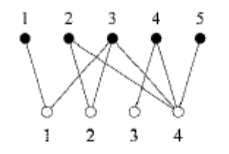

Find the incidence matrix of this bipartite network.

**The incidence matrix is:**

\begin{bmatrix}
1&0&0&0\\
0&1&0&1\\
1&1&0&1\\
0&0&1&1\\
0&0&0&1
\end{bmatrix}

Then draw the one-mode projections of the bipartite network. 

In [56]:
B = np.array([
[1,0,0,0],
[0,1,0,1],
[1,1,0,1],
[0,0,1,1],
[0,0,0,1]
])

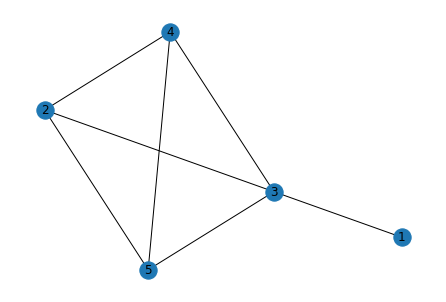

In [62]:
BB = B@B.T
BB[np.diag_indices_from(BB)]=0
nx.draw_kamada_kawai(nx.Graph(BB),labels={i:i+1 for i in range(5)},with_labels=True)